In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import statsmodels.api as sm

# import warnings
# warnings.simplefilter('ignore')


sns.set_style('darkgrid')
%matplotlib inline

## Comparison SARIMA x auto_arima

`Comparison between a model generated by auto_arima and a SARIMA model with the same parameters`

In [2]:
complete_dataset = pd.read_csv('./../data/owid-covid-data.csv')
interest_columns = ['location', 'date', 'new_cases', 'new_cases_smoothed']
dataset = complete_dataset[interest_columns].copy()
dataset = dataset.set_index('date')

# Filter only world data

cases = dataset[dataset['location'] == 'World']

In [3]:
train_size = 400
y = cases['new_cases']
train, test = train_test_split(y, train_size=train_size)

In [8]:
#%%timeit
auto_arima = pm.auto_arima(train, seasonal=True, m=12)
print("Auto Arima Fit")

Auto Arima Fit


`42.8 s ± 791 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)`


In [61]:
# %%timeit
arima = pm.arima.ARIMA(
    order=auto_arima.order, 
    seasonal_order=auto_arima.seasonal_order
).fit(train)
print("SARIMAX Fit")

SARIMAX Fit


`3.62 s ± 72.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)`

In [62]:
steps = 20
am_forecast = auto_arima.predict(steps)
ar_forecast = arima.predict(steps)

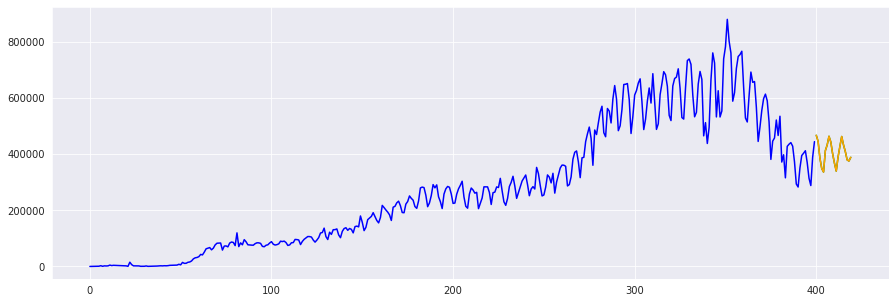

In [63]:
plt.figure(figsize=(15,5))
x = np.arange(y.shape[0])
f = np.arange(train_size + steps)
plt.plot(x[:train_size], train, c='blue')
plt.plot(f[train_size:], am_forecast, c='green')
plt.plot(f[train_size:], ar_forecast, c='orange')
# plt.plot(x[train_size:], test, c='black')
plt.show()

## ARIMA Summary

In [64]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  400
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -4719.636
Date:                            Sat, 24 Apr 2021   AIC                           9459.273
Time:                                    11:46:41   BIC                           9499.162
Sample:                                         0   HQIC                          9475.071
                                            - 400                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3085.5295   1513.634      2.038      0.042     118.862    6052.197
ar.L1          1.1810      0.038     31.276      0.000       1.107       1.255
ar.L2         -0.8370      0.030    -27.959      0.000      -0.896      -0.778
ma.L1         -1.4247      0.039    -36.969      0.000      -1.500      -1.349
ma.L2          0.7899      0.039     20.205      0.000       0.713       0.867
ar.S.L12      -0.3177      0.148     -2.147      0.032      -0.608      -0.028
ar.S.L24      -0.8617      0.132     -6.549      0.000      -1.120      -0.604
ma.S.L12       0.1769      0.177      1.002      0.316      -0.169       0.523
ma.S.L24       0.7302      0.163      4.467      0.000       0.410       1.051
sigma2      1.291e+09      0.002   5.65e+11      0.000    1.29e+09    1.29e+09
===================================================================================
Ljung-Box (L1) (Q):                  11.34   Jarque-Bera (JB):               308.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              35.39   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.04e+27. Standard errors may be unstable.
"""

(2, 0, 2, 12)